In [1]:
import mod1
import importlib
importlib.reload(mod1)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import t

In [2]:
list_name_tickers = [
    'MSFT',
    'AAPL',
    'FB',
    'AMZN',
    'NDAQ',
    'SPY'
]
list_name_tickers_pf = [
    'MSFT',
    'AAPL',
    'FB'
]
nb_days = 252
period = '252d'
df_stocks_prices = mod1.create_df_prices(list_name_tickers, period=period, cat='Open')

In [3]:
df_returns = df_stocks_prices.pct_change()[1:]
df_pf = df_stocks_prices[list_name_tickers_pf]
df_pf_returns = df_pf.pct_change()[1:]
mean_returns = np.array(df_returns.mean())
cov_returns = np.array(df_returns.cov())
rf_rate = 0.0047
market_returns = df_returns['SPY']

weights = [0.333, 0.333, 0.333]
daily_returns = mod1.pf_daily_returns(weights, df_pf_returns, nb_days)

In [4]:
#mod1.plot_stock_prices(df_stocks_prices)

In [5]:
df_a_b = mod1.compute_alpha_beta(df_pf_returns, market_returns, daily_returns)
df_a_b.head()

,MSFT,AAPL,FB,pf
,,,,
alpha,0.001003,0.001732,0.000711,0.001148
beta,1.016641,1.158908,0.971629,1.048010


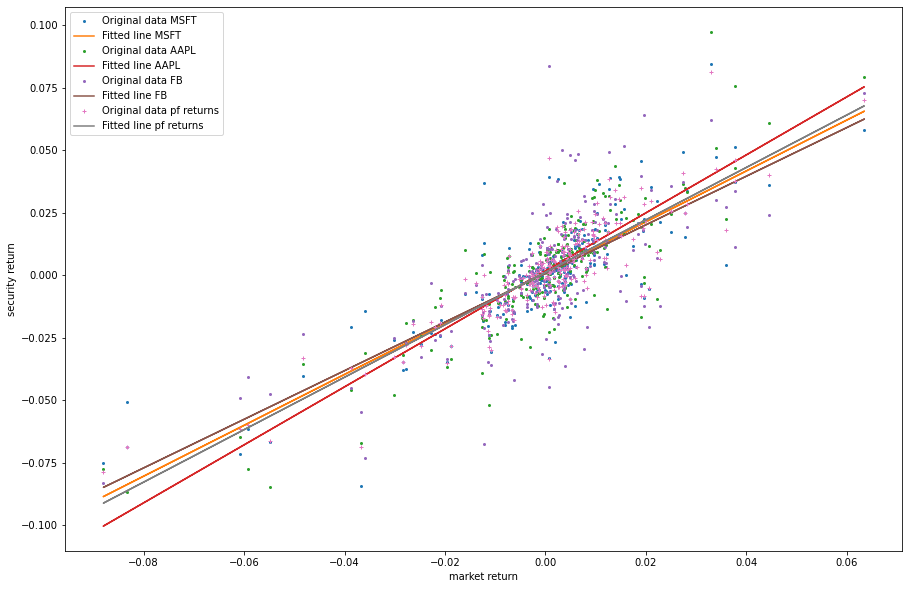

In [6]:
mod1.plot_alpha_beta(df_pf_returns, market_returns, df_a_b, daily_returns)